# Market Making Strategy
_Version 0.1_

TODO:
1. Calculate position over time
1. plot position over time
1. full P&L calc
 1. and residual mark to market
1. risk adjustment

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import marketmaker as mm

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [60]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!
tickfile = '../Data/TSLA-TAQ-aug19v2.zip'
taq = pd.read_pickle( tickfile )

In [91]:
# filter on date
test_day1 = '08/07/19'
test_day2 = '08/12/19'
day1 = taq[ test_day ]
day2 = taq[ test_day2 ]

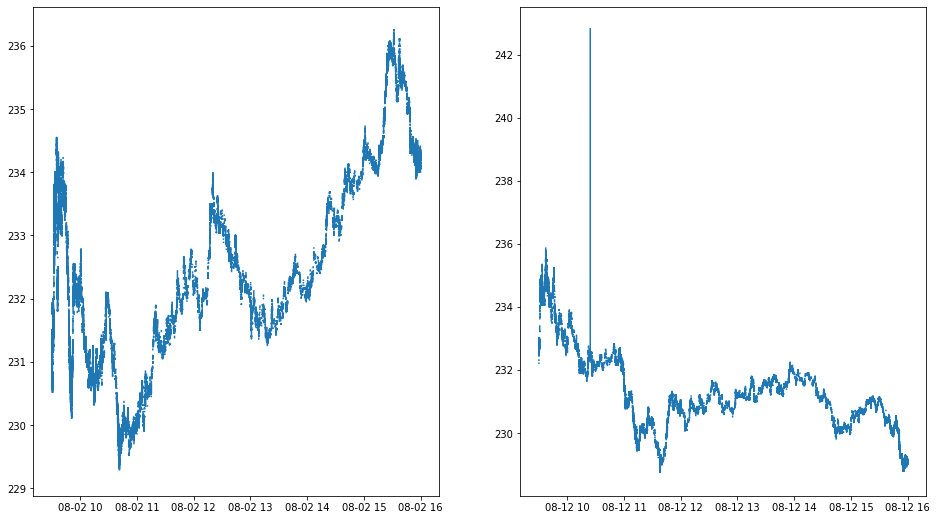

In [93]:
fig, ( plt1, plt2 ) = plt.subplots( 1, 2 )
plt1.plot( day1.trade_px )
plt2.plot( day2.trade_px )

## V1 - simple peg to BBO

In [141]:
# without the tick signal...
results = mm.algo_loop( day1, tick_coef=0, peg_to_bbo=True )

2019-11-13 12:34:59:977434: Beginning Market-Making Strategy run
Average stock spread for sample: 10.2568
2019-11-13 12:35:00:488350: starting main loop
2019-11-13 13:49:58:612424: end simulation loop
2019-11-13 13:49:58:612626: order analytics
2019-11-13 13:49:58:838332: Algo run complete.


In [144]:
print("buy count: {} sell count: {}".format(len(results['buys']), len(results['sells'])))

buy count: 18549 sell count: 19857


In [147]:
# TODO calc P&L
# price * shares / shares

avg_sell = ( sells.price * sells.shares ).sum() / sells.shares.sum()
avg_buy = ( buys.price * buys.shares ).sum() / buys.shares.sum()
PNL = avg_sell - avg_buy
print( "avg P&L per share: {}".format( PNL ) )

avg P&L per share: 0.6145217500687181


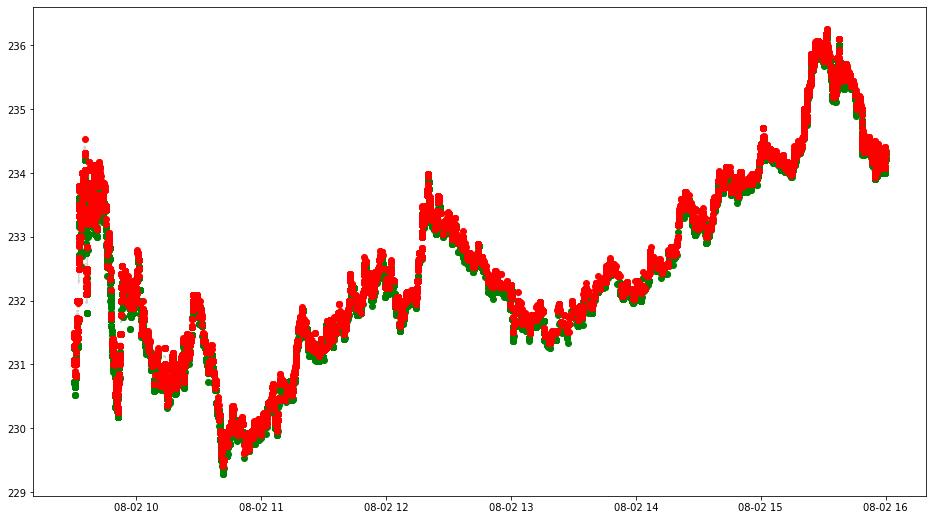

In [145]:
buys = results['buys']
sells = results['sells']
plt.plot(results['midpoints'], color="lightgray")
plt.plot(buys.price, "go")
plt.plot(sells.price, "ro")

That's a lot of trades!  It's also unrealistic in that we are being very over optimistic about the fill rate. 

I'll leave it as an exercise for the reader to explore that further and analyze the P&L as below.

## V2 - use tick signal to adjust

In [159]:
# without the tick signal...
results = mm.algo_loop( day1, tick_coef=1, peg_to_bbo=False )

2019-11-13 14:29:27:314088: Beginning Market-Making Strategy run
Average stock spread for sample: 10.2568
2019-11-13 14:29:27:822283: starting main loop
2019-11-13 14:54:54:711608: end simulation loop
2019-11-13 14:54:54:711992: order analytics
selling to close residual of 11717.0 shares
2019-11-13 14:54:55:545648: Algo run complete.


In [149]:
print("buy count: {} sell count: {}".format(len(results['buys']), len(results['sells'])))

buy count: 632 sell count: 370


In [150]:
# TODO calc P&L
# price * shares / shares

avg_sell = ( sells.price * sells.shares ).sum() / sells.shares.sum()
avg_buy = ( buys.price * buys.shares ).sum() / buys.shares.sum()
PNL = avg_sell - avg_buy
print( "avg P&L per share: {}".format( PNL ) )

avg P&L per share: 0.6145217500687181


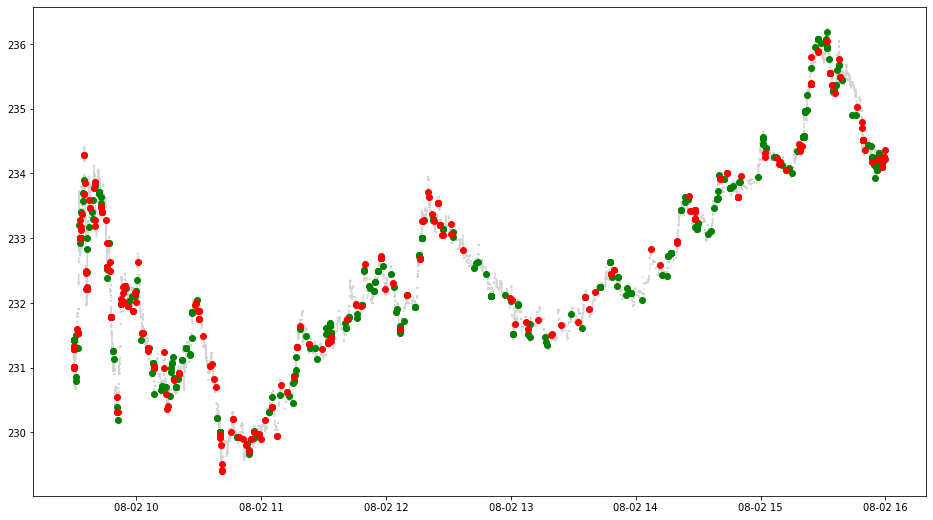

In [151]:
buys = results['buys']
sells = results['sells']
plt.plot(results['midpoints'], color="lightgray")
plt.plot(buys.price, "go")
plt.plot(sells.price, "ro")

### Performance

Since we are forcing net position to 0, for now we can just calculate a simple difference between avg buy and sell price.  Ideally we need to also calculate intraday P&L, etc. 

In [152]:
# TODO calc P&L
# price * shares / shares

avg_sell = ( sells.price * sells.shares ).sum() / sells.shares.sum()
avg_buy = ( buys.price * buys.shares ).sum() / buys.shares.sum()
PNL = avg_sell - avg_buy
print( "avg P&L per share: {}".format( PNL ) )

avg P&L per share: 0.4279103375821478


What about exposure? how much did we end up with on one side or the other?

In [153]:
# TODO: sum of buys and sells
net_residual = buys.shares.sum() - sells.shares.sum()
print(net_residual)

0.0


In [154]:
# lot net_positions

In [157]:
net_pos = results['net_positions'].dropna()

In [164]:
net_pos.tail()

,position
2019-08-02 15:59:05.231136440,11854
2019-08-02 15:59:06.913243372,11754
2019-08-02 15:59:06.960751831,11654
2019-08-02 15:59:19.247444282,11719
2019-08-02 15:59:40.386309300,11717
